# Задача 1. Разведочный анализ

* Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
* Считать данные и вывести их основные характеристики, описание признаков.
* Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным. 
* (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи. 
* Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания. 
* (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции). 
* (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering). 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## 1. Загрузка данных
Датасет: https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m <br>
Описание данных: <br>
Этот набор данных содержит обширную информацию о клиентах, собранную из портфеля потребительских кредитных карт, с целью помочь аналитикам прогнозировать отток клиентов. Он включает в себя исчерпывающие демографические данные, такие как возраст, пол, семейное положение и категория дохода, а также информацию об отношениях каждого клиента с поставщиком кредитных карт, таких как тип карты, количество месяцев на балансе и периоды неактивности. Кроме того, он содержит ключевые данные о поведении клиентов в отношении расходов, приближающихся к их решению об оттоке, такие как общий возобновляемый баланс, кредитный лимит, средняя открытая ставка для покупки и поддающиеся анализу показатели, такие как общая сумма изменений с 4 квартала на 1 квартал, средний коэффициент использования и флаг истощения наивного байесовского классификатора (категория карты объединяется с количеством контактов за 12-месячный период наряду с зависимым количеством, а также уровнем образования и месяцами неактивности). Столкнувшись с этим набором полезных прогнозируемых точек данных по нескольким переменным, мы получаем актуальную информацию, которая может определить долгосрочную стабильность счета или предстоящий уход, что дает нам полное понимание при попытке управлять портфелем или обслуживать отдельных клиентов.

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.groupby(by='Attrition_Flag') \
.agg({'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2' : 'mean'})

,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Attrition_Flag,
Attrited Customer,0.005091
Existing Customer,0.999814


Уберем 2 последних столбца так как они явно указывают на то, что клиент уйдет и это повлияет на наши предсказания в будущем

In [4]:
df = df.iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 2. Основные характеристики данных

Описание данных:
* CLIENTNUM - Уникальный идентификатор для каждого клиента. (int)
* Attrition_Flag - Флаг, указывающий, ушел ли клиент. (string)
* Customer_Age - Возраст клиента. (int)
* Gender - Пол клиента. (string)
* Dependent_count - Количество иждивенцев, которые есть у клиента. (int)
* Education_Level - Уровень образования клиента. (string)
* Marital_Status - Семейное положение заказчика. (string)
* Income_Category - Доходная категория клиента. (string)
* Card_Category - Тип карты, которой владеет клиент. (string)
* Months_on_book - Как долго клиент пользуется картой. (int)
* Total_Relationship_Count - Общее количество взаимоотношений клиента с поставщиком кредитной карты. (int)
* Months_Inactive_12_mon - Количество месяцев, в течение которых клиент был неактивен за последние двенадцать месяцев. (int)
* Contacts_Count_12_mon - Количество контактов с клиентом за последние двенадцать месяцев. (int)
* Credit_Limit - Кредитный лимит клиента. (int)
* Total_Revolving_Bal - Общий оборотный баланс клиента. (int)
* Avg_Open_To_Buy - Среднее отношение числа открытых к покупке клиентов. (int)
* Total_Amt_Chng_Q4_Q1 - Общая сумма изменений с 4 квартала на 1 квартал. (float)
* Total_Trans_Amt - Общая сумма сделки. (int)
* Total_Trans_Ct - Общее количество транзакций. (int)
* Total_Ct_Chng_Q4_Q1 - Общее количество изменено с квартала 4 на квартал 1. (float)
* Avg_Utilization_Ratio - Средний коэффициент использования клиента. (float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## 3. Задача предсказания

Нам интересно предсказывать отток клиентов. Информация о том, использует ли человек кредитную карту содержится в столбце `Attrition_Flag`

## 4. Чистка данных

In [8]:
df.isin(['Unknown']).any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category              True
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [9]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Из всех неизвестных значений больше всего влияет на то, будет ли человек в будущем пользоваться кредитной картой, это уровень дохода. Чем ниже уровень дохода человека, тем чаще он будет обращаться за кредитными деньгами для крупных покупок. <br>

Рассмотрим категории дохода в разрезе 3 показателей: среднее количество членов семьи, среднее количество использований карты за год и средняя сумма денег, взятых в кредит.

In [10]:
df.groupby(by=['Income_Category']).agg({'Dependent_count': 'mean'}) \
.join(df.groupby(by=['Income_Category']).agg({'Total_Trans_Ct': 'mean'}), on='Income_Category') \
.join(df.groupby(by=['Income_Category']).agg({'Total_Trans_Amt': 'mean'}), on='Income_Category')

,Dependent_count,Total_Trans_Ct,Total_Trans_Amt
Income_Category,,,
$120K +,2.462173,63.704264,4529.467675
$40K - $60K,2.308380,65.000559,4405.618994
$60K - $80K,2.440086,63.247504,4450.712553
$80K - $120K,2.492508,62.696417,4482.960261
Less than $40K,2.263690,66.154732,4363.420107
Unknown,2.275180,66.250899,4282.211331


Из полученных данных можно сделать следующие выводы:
* По количеству членов семьи неизвестная группа ближе к группе, зарабатывающей менее 40K
* Неизвестная группа так же часто пользуется кредитной картой как и зарабатывающие менее 40K. 
* Неизвестная группа имеет наименьший оборот кредитных денег. 

На основании выводов можно отнести группу к категории заработка менее 40K.

In [11]:
df.Income_Category.replace(to_replace='Unknown', value='Less than $40K', inplace=True)

In [12]:
df.Income_Category.isin(['Unknown']).any()

False

## 5. Анализ признаков

Соотношение действующих клиентов к ушедшим

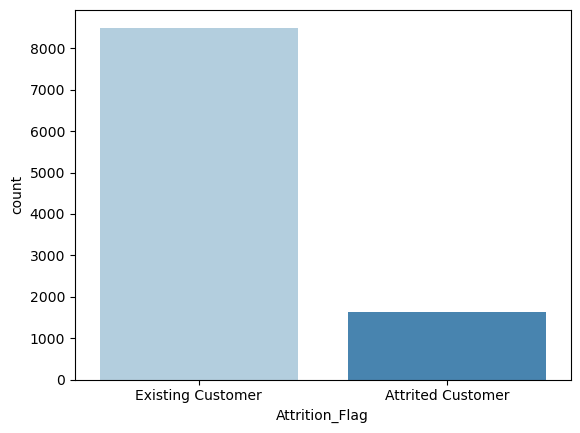

In [13]:
sns.countplot(x='Attrition_Flag',data=df,palette='Blues' );

Возраст клиентов

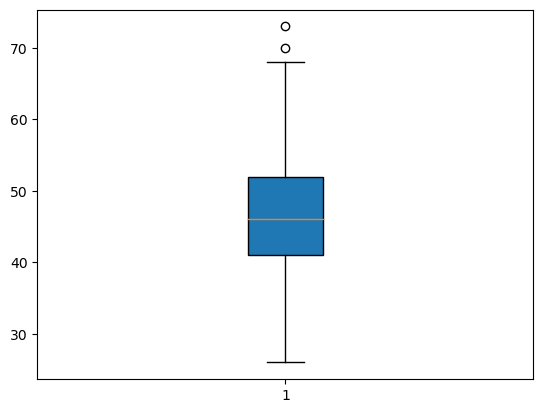

In [14]:
plt.boxplot(df['Customer_Age'],patch_artist=True);

Пол клиента и его семейное положение

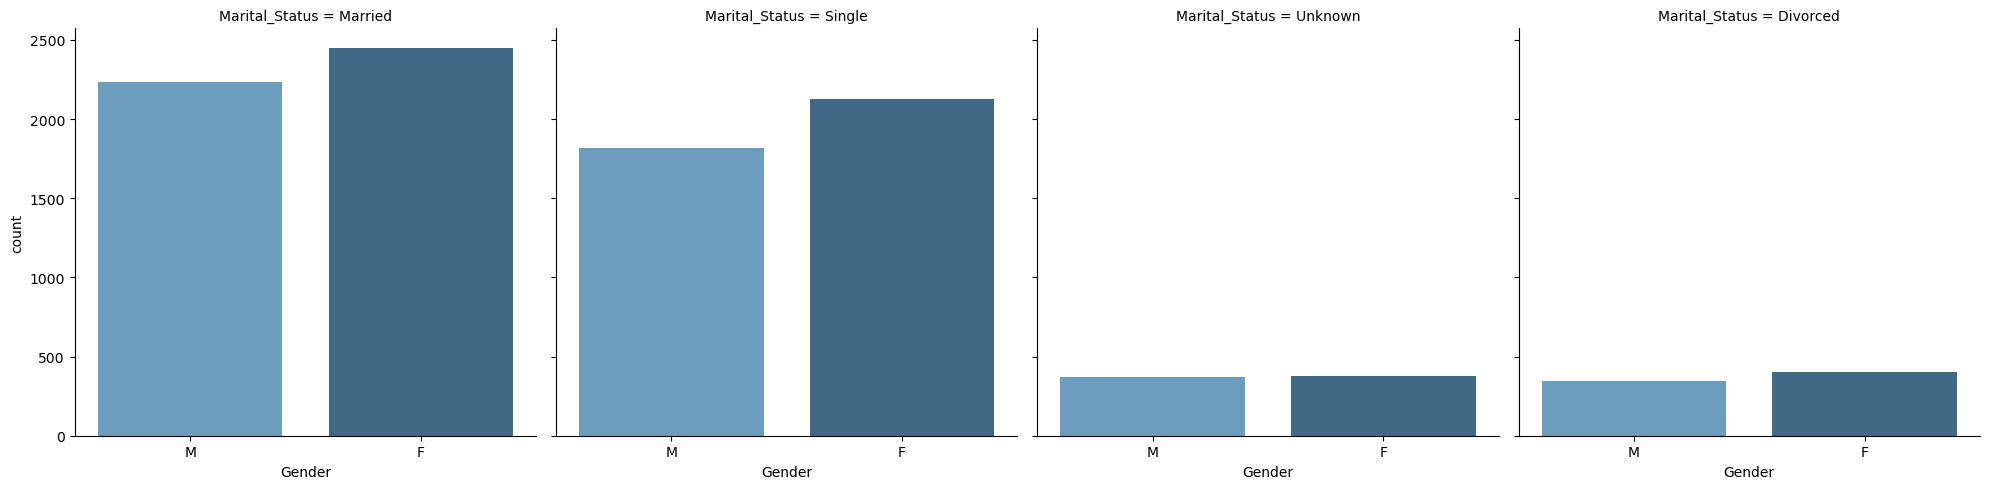

In [15]:
sns.catplot(x='Gender',data=df,palette='Blues_d',kind='count',col='Marital_Status');

Образование клиентов

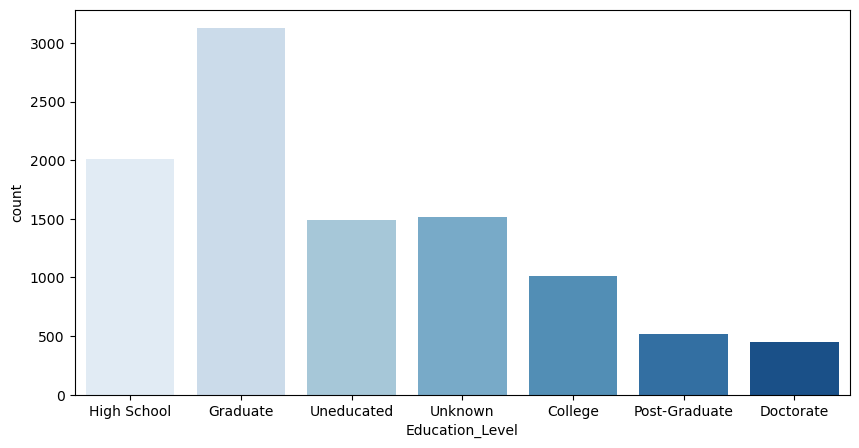

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education_Level',data=df,palette='Blues');

Большинство клиентов получили высшее образование

Соотношние между активными или ушедшими клиентами и их уровнем дохода

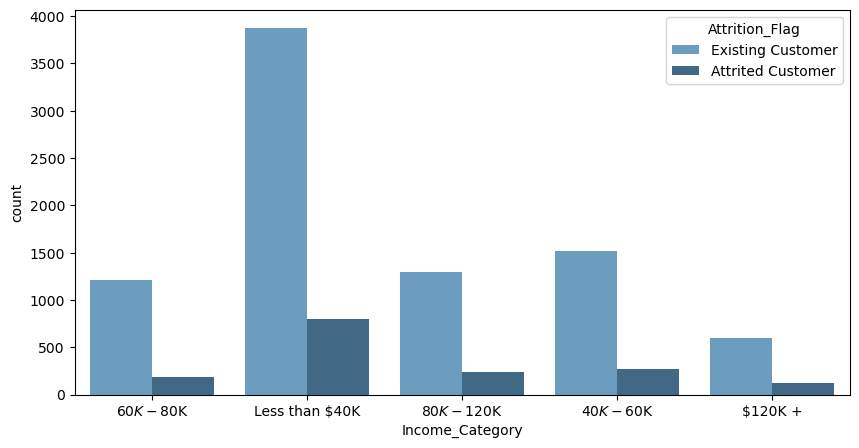

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df,palette='Blues_d',hue='Attrition_Flag');

Зависимость между уровнем дохода и необходимостью пользоваться кредитной картой есть. Люди с небольшим уровнем дохода чаще делают себе кредитные карты. 

Но эта зависимость никак не влияет на то, продолжит ли человек пользоваться картой. Соотношение между пользователями карт и ушедшими клиентами везде примерно одинаковое.

Какой тип карты чаще всего у клиента

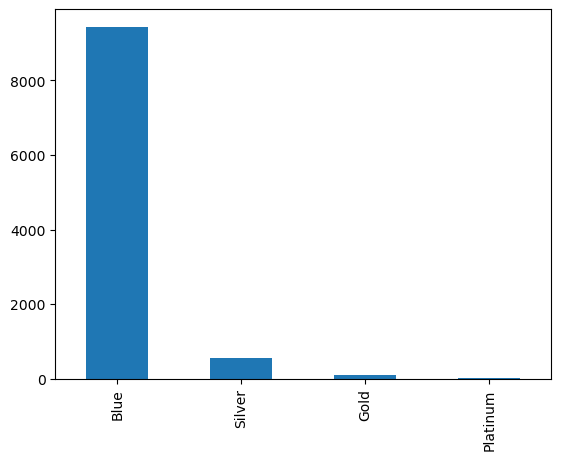

In [18]:
df.Card_Category.value_counts().plot(kind='bar');

Сколько месяцев клиенты пользуются картой

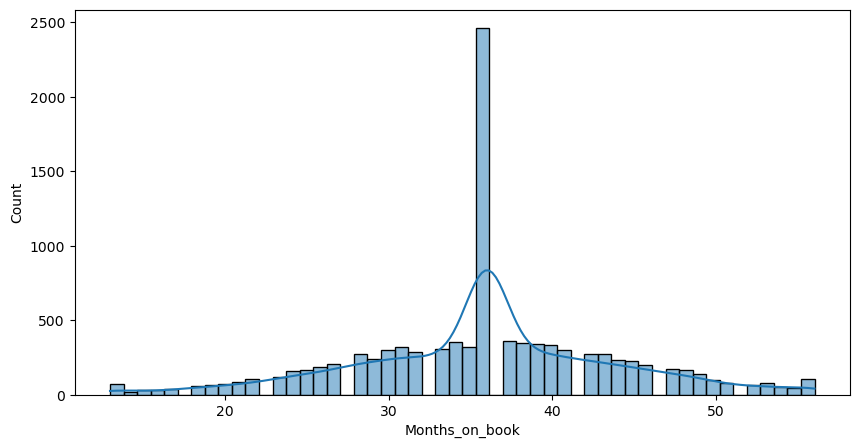

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x='Months_on_book',data=df,kde=True);

Больше всего клиентов уходит через 36 месяцев

Количество членом семьи у клиента

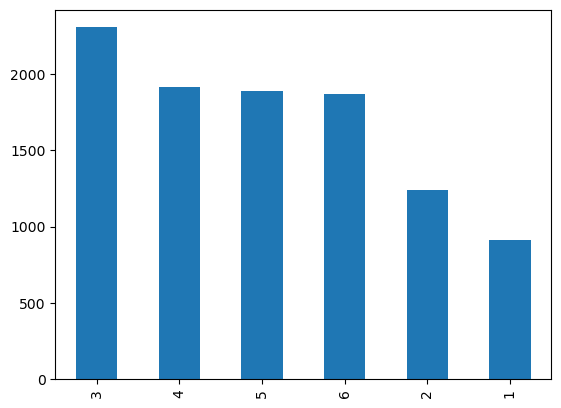

In [20]:
df.Total_Relationship_Count.value_counts().plot(kind='bar');

Влияние частоты взаимодействия с клиентом на его уход

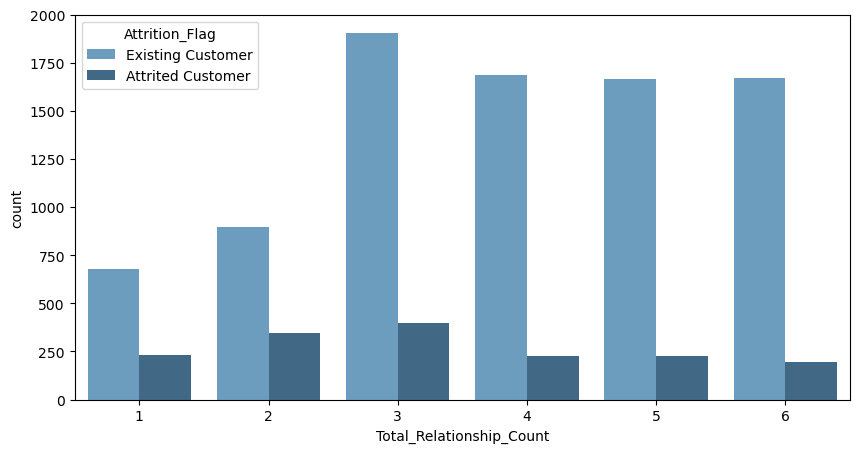

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Relationship_Count',data=df,palette='Blues_d',hue='Attrition_Flag');

Распределение кредитного лимита клиентов

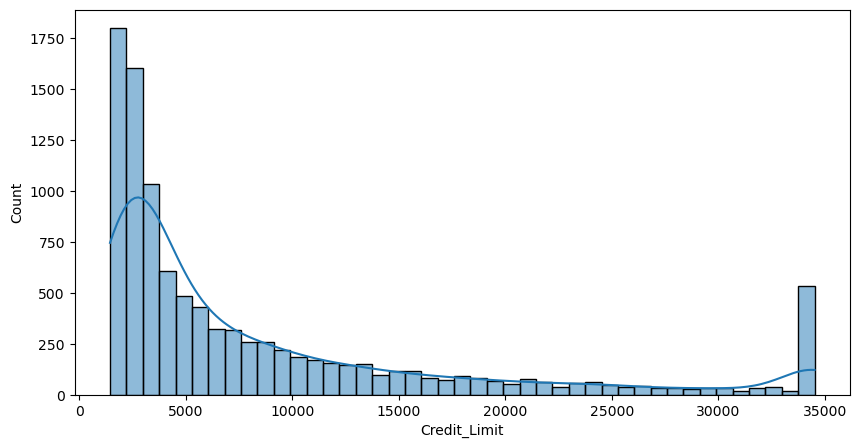

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(x='Credit_Limit',data=df,kde=True);

Зависимость между числом обращений и суммой транзакций

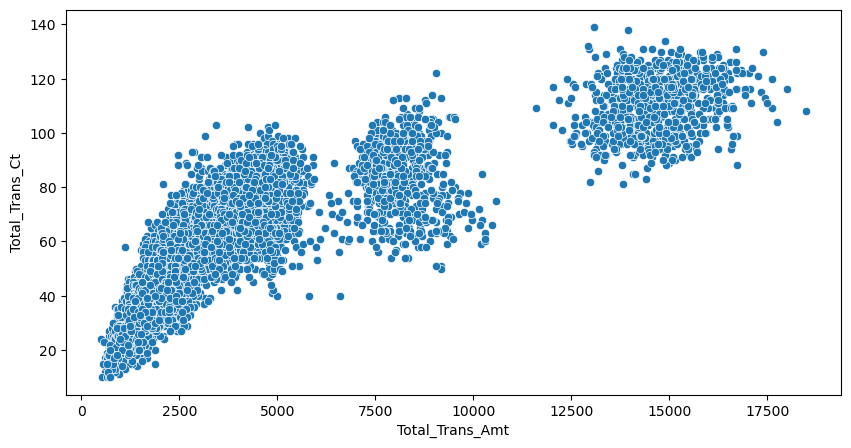

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df);

Положительная зависомость не удивительна. Чем чаще клиент пользуется картой, тем больше денег он тратит.

каков средний коэффициент использования клиента

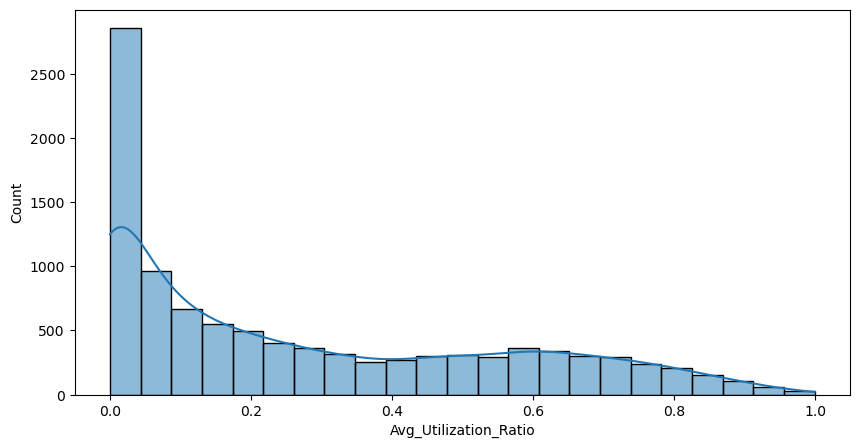

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(x='Avg_Utilization_Ratio',data=df,kde=True);

## 6. Зависимость между признаками

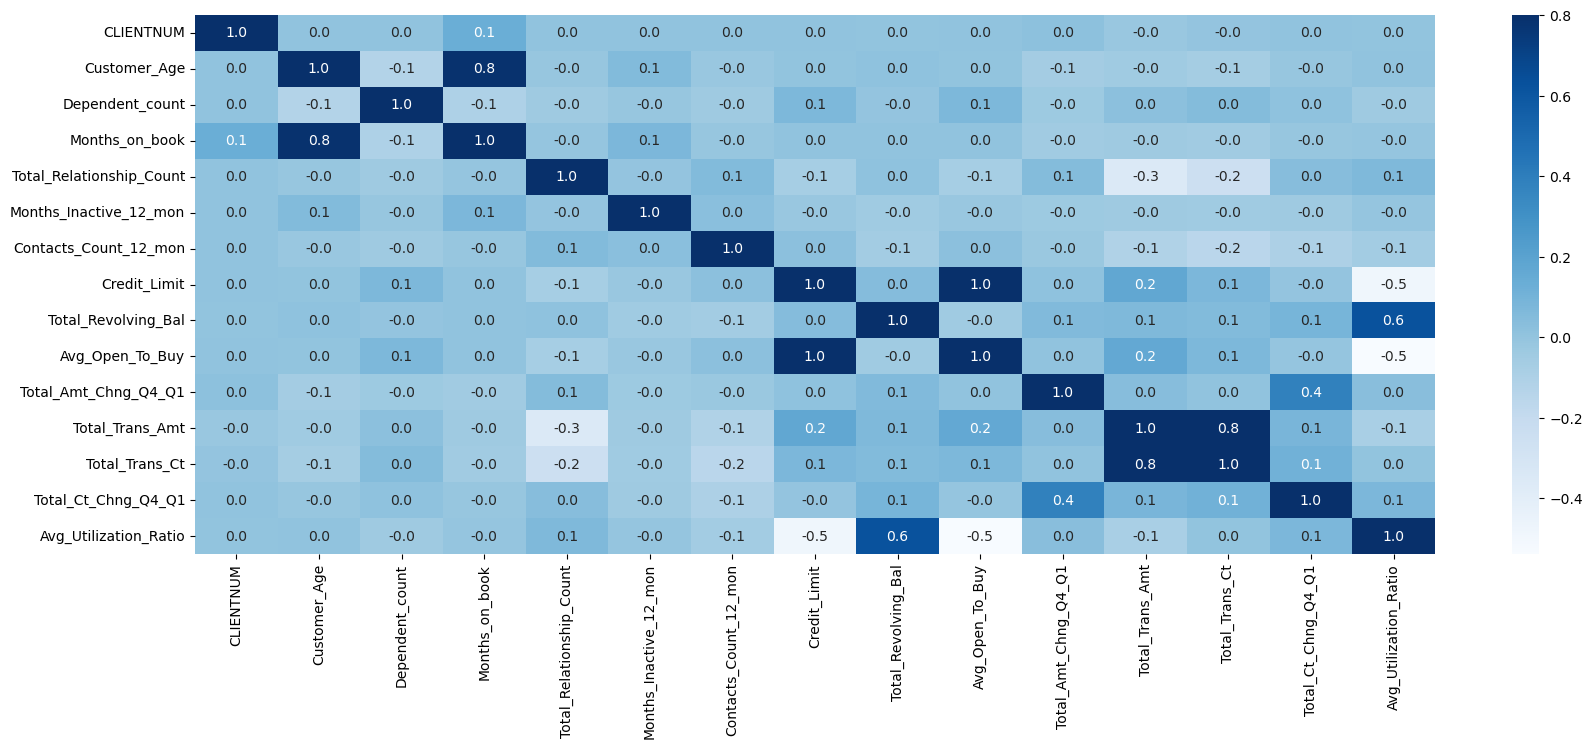

In [25]:
plt.figure(figsize=(20,7))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='Blues',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

* Наибольшая корреляция между возрастом и временем использования карты а также количеством использований карты и суммой сделок
* Существует корреляция существует между коэффицентом использования карты клиента и общим оборотным балансом

## 7. Преобразование данных

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [27]:
#преобразуем категориальные признаки в количественные
lis=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
le=LabelEncoder()
for column in lis:
    df[column]=le.fit_transform(df[column])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [28]:
X=df.drop(columns=['Attrition_Flag'])
y=df['Attrition_Flag']
X.shape,y.shape

((10127, 20), (10127,))

In [29]:
# Стандартизуем данные чтобы большие значения не влияли на результат работы альгоритма
X=StandardScaler().fit_transform(X)
X[:3]

array([[ 8.02878101e-01, -1.65405580e-01,  1.05995565e+00,
         5.03368127e-01, -5.26365976e-02, -6.28127573e-01,
        -5.48175097e-01, -2.59473284e-01,  3.84620878e-01,
         7.63942609e-01, -1.32713603e+00,  4.92403766e-01,
         4.46621903e-01, -4.73422218e-01,  4.88970818e-01,
         2.62349444e+00, -9.59706574e-01, -9.73895182e-01,
         3.83400260e+00, -7.75882235e-01],
       [ 2.15686101e+00,  3.33570383e-01, -9.43435701e-01,
         2.04319867e+00, -5.97678339e-01,  7.27305611e-01,
         9.05633782e-01, -2.59473284e-01,  1.01071482e+00,
         1.40730617e+00, -1.32713603e+00, -4.11615984e-01,
        -4.13666521e-02, -3.66666822e-01, -8.48598788e-03,
         3.56329284e+00, -9.16432607e-01, -1.35734038e+00,
         1.26085729e+01, -6.16275655e-01],
       [-6.82768542e-01,  5.83058365e-01,  1.05995565e+00,
         5.03368127e-01, -5.97678339e-01, -6.28127573e-01,
         1.78729343e-01, -2.59473284e-01,  8.96451285e-03,
         1.20579050e-01, -1.3

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66, stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7595, 20), (2532, 20), (7595,), (2532,))

In [31]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train),LR.score(x_test,y_test)

(0.9037524687294273, 0.9087677725118484)